In [13]:
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic (1).csv


In [14]:
import pandas as pd

col_names = ['passenger_id', 'p_class', 'sex', 'age', 'sib_sp', 'parch', 'survived']

df = pd.read_csv("titanic.csv", names = col_names).iloc[1:]

print(df.head())

  passenger_id p_class sex   age sib_sp parch survived
1            1       3   1  34.5      1     0        0
2            2       1   0    47      1     0        1
3            3       3   0    62      0     0        1
4            4       1   0    27      1     0        1
5            5       3   1    22      0     0        0


In [15]:
features = ['passenger_id', 'p_class', 'sex', 'age', 'sib_sp', 'parch']
X = df[features]
y = df.survived

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6791044776119403


In [17]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<p_class &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<passenger_id &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<passenger_id &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<passenger_id &le; 294.5<br/>gini = 0.49<br/>samples = 7<b

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [19]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.746268656716418


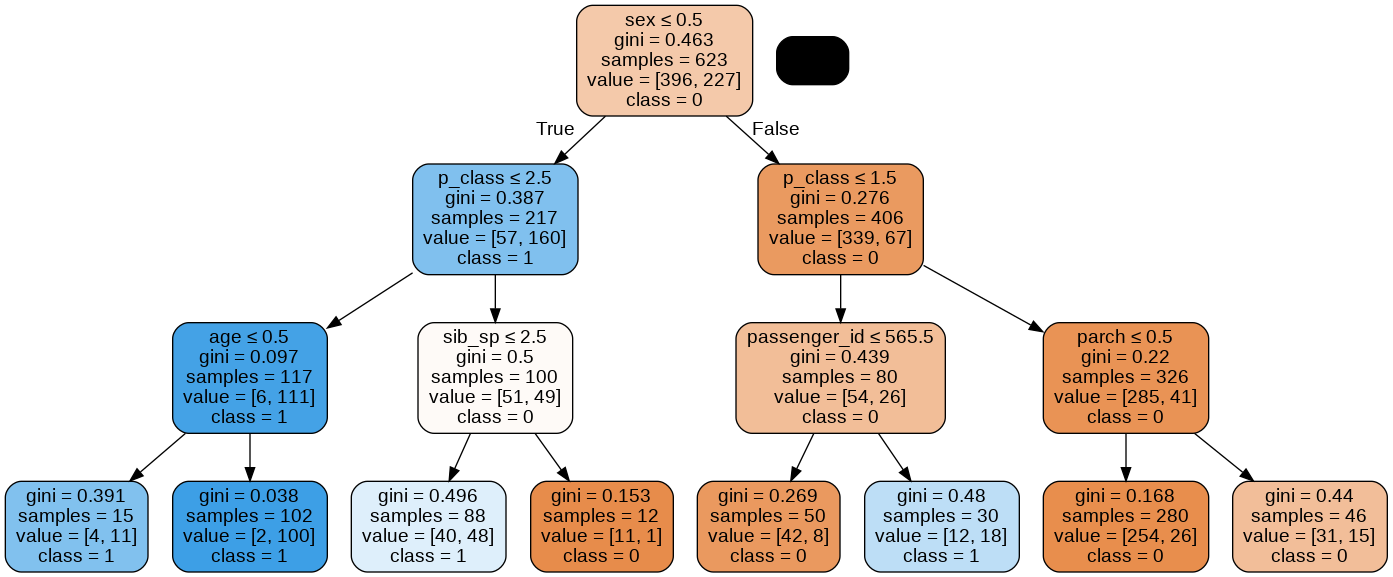

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())